## Ecological Moddeling

This notebook is just me tinkering with Numpy and Scipy to solve ODEs

In [1]:
# first we import the libraries we need
import numpy as np
import matplotlib.pyplot as plt

# The following lines makes the plots appear inline in the notebook
%matplotlib inline

### Competitive Lotka-Volterra Equation (in two-dimensions)

The competitive Lotka-Volterra equations take the following form: 

$\frac{dx_i}{dt} = r_i x_i (1 -  \sum_{j=1}^{N} \alpha_{ij}x_j)$

See below a functional approach to their solution for a two-species system.

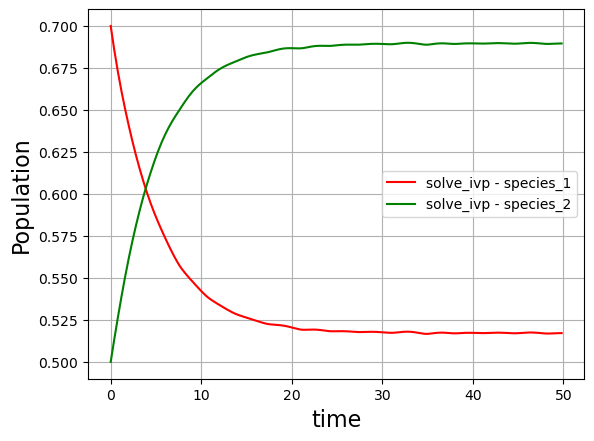

In [72]:
#import integration solve_ivp
from scipy.integrate import solve_ivp


A=np.array([[1.0, 0.7], [0.6, 1.0]])  #Transition Matrix - eigenvalues +ve for stability
r=np.array([1.1, 0.87])                #r's to be >0


def calculate_equation_dydt(t, y):
    """Returns the gradient dy/dt for the L-V equation"""
    dydt = np.array([0.0, 0.0])
    for i in [0,1]:
        sum = 0.0
        for j in [0,1]:
            sum += A[i,j]*y[j]
            dydt[i] = r[i]*y[i]*(1 - sum)
    return dydt

max_time = 50.0
N_time_steps = 250
delta_t = max_time / N_time_steps
t_solution = np.linspace(0.0, max_time-delta_t, N_time_steps) # values of independent variable 
y0 = np.array([0.7,0.5]) # an initial condition, y(0) = y0, note it needs to be an array

solution = solve_ivp(calculate_equation_dydt, [0,max_time], y0,
                        method='RK45', t_eval=t_solution)
 
plt.grid()
plt.xlabel("time", fontsize=16)
plt.ylabel("Population", fontsize=16) 
plt.plot(solution.t, solution.y[0], 'r-', label="solve_ivp - species_1")
plt.plot(solution.t, solution.y[1], 'g-', label="solve_ivp - species_2")
plt.legend(loc='best');

### Competitive Lotka-Volterra Equation (in 3-dimensions)

The competitive Lotka-Volterra equations take the following form: 

$\frac{dx_i}{dt} = r_i x_i (1 -  \sum_{j=1}^{N} \alpha_{ij}x_j)$

See below a functional approach to their solution for a 3-species system.

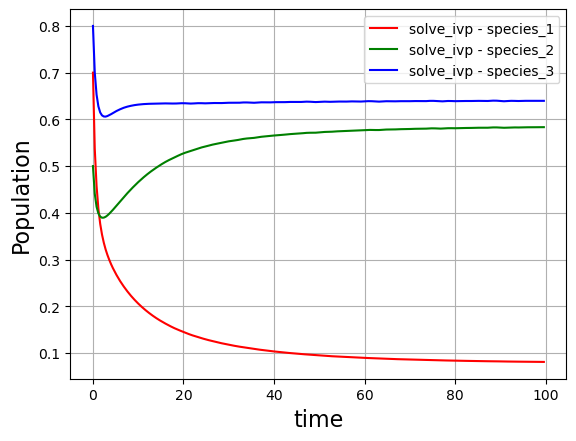

In [7]:
#import integration solve_ivp
from scipy.integrate import solve_ivp


A=np.array([[1.0, 0.7, 0.8], [0.8, 1.0, 0.55], [0.56, 0.54, 1.0]])  #Transition Matrix - eigenvalues +ve for stability
r=np.array([1.25, 0.87, 0.99])                #r's to be >0


def calculate_equation_dydt(t, y):
    """Returns the gradient dy/dt for the L-V equation"""
    dydt = np.array([0.0, 0.0, 0.0])
    for i in [0,1,2]:
        sum = 0.0
        for j in [0,1,2]:
            sum += A[i,j]*y[j]
            dydt[i] = r[i]*y[i]*(1 - sum)
    return dydt

max_time = 100.0
N_time_steps = 250
delta_t = max_time / N_time_steps
t_solution = np.linspace(0.0, max_time-delta_t, N_time_steps) # values of independent variable 
y0 = np.array([0.7,0.5, 0.8]) # an initial condition, y(0) = y0, note it needs to be an array

solution = solve_ivp(calculate_equation_dydt, [0,max_time], y0,
                        method='RK45', t_eval=t_solution)
 
plt.grid()
plt.xlabel("time", fontsize=16)
plt.ylabel("Population", fontsize=16) 
plt.plot(solution.t, solution.y[0], 'r-', label="solve_ivp - species_1")
plt.plot(solution.t, solution.y[1], 'g-', label="solve_ivp - species_2")
plt.plot(solution.t, solution.y[2], 'b-', label="solve_ivp - species_3")
plt.legend(loc='best');

### Competitive Lotka-Volterra Equation (in 3-dimensions) - Using an OOP approach

The competitive Lotka-Volterra equations take the following form: 

$\frac{dx_i}{dt} = r_i x_i (1 -  \sum_{j=1}^{N} \alpha_{ij}x_j)$

See below an object-oriented programming approach to their solution for a 3-species system.

In [79]:
from scipy.integrate import solve_ivp

class Ecosystem:
    def __init__(self, name="", transition_matrix=np.array([[0,0,0], [0,0,0], [0,0,0]]), per_capita_growth_rates=np.array([0, 0, 0]), initial_population=np.array([0, 0, 0]), dydt=[0, 0, 0]):
        self.name = name
        self.transition_matrix = transition_matrix
        self.per_capita_growth_rates = per_capita_growth_rates
        self.initial_population = initial_population
        self.__dydt = dydt

    def calculate_equation_dydt(self):
        """Returns the gradient dy/dt for the L-V equation"""
        self.dydt = np.array([0.0, 0.0, 0.0])
        for i in [0,1,2]:
            sum = 0.0
            for j in [0,1,2]:
                sum += self.transition_matrix[i,j]*self.initial_population[j]
                self.dydt[i] = self.per_capita_growth_rates[i]*self.initial_population[i]*(1 - sum)
        return self.dydt

    def solve_equation_dydt(self, max_time, time_steps):
        delta_t = max_time / time_steps
        t_solution = np.linspace(0.0, max_time-delta_t, time_steps) # values of independent variable 
        solution = solve_ivp(self.dydt, [0,max_time], self.initial_population, method='RK45', t_eval=t_solution)
        return solution


    def plot_solution_dydt(self):
        plt.grid()
        plt.xlabel("time", fontsize=16)
        plt.ylabel("Population", fontsize=16) 
        plt.plot(solution.t, solution.y[0], 'r-', label="solve_ivp - species_1")
        plt.plot(solution.t, solution.y[1], 'g-', label="solve_ivp - species_2")
        plt.plot(solution.t, solution.y[2], 'b-', label="solve_ivp - species_3")
        plt.legend(loc='best');

first_ecosystem = Ecosystem ("first_eco", np.array([[1.0, 0.7, 0.8], [0.8, 1.0, 0.55], [0.56, 0.54, 1.0]]), ([1.25, 0.87, 0.99]), ([0.7,0.5, 0.8]), [0, 0, 0])

first_ecosystem.calculate_equation_dydt()

first_ecosystem.solve_equation_dydt(100, 250)
    



TypeError: 'numpy.ndarray' object is not callable